In [1]:
# Standard imports
import numpy as np
import yaml
import toml
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline  
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 20]

# bolo-calc import
from bolo import Top

import BoloCalcVariation as bcv

In [2]:
# Set up inputs

# yaml files to use
#telescopes = dict.fromkeys(['CHLAT_20210401.yaml', 'SPLAT_20210401.yaml', 'SAT_pole_20210401.yaml'])
telescopes = dict.fromkeys(['CHLAT_20210714.yaml','SPLAT_20210714.yaml','SAT_LFMF_20210714.yaml','SAT_HF_20210714.yaml'])

#read fixed PSATs from .toml file
psat = toml.load("FixedPsats.toml")

# input parameter to vary
xparam_name = 'det_eff'
xparam_vec = np.arange(.3,1.0,.02)
# in_param possible values:
#  'band_response', 'num_wafer_per_optics_tube', 'num_optics_tube', 
#  'waist_factor', 'psat', 'psat_factor', 'carrier_index', 'Tc', 'Tc_fraction', 
#  'G', 'Flink', 'Yield', 'response_factor', 'bolo_resistance', 'read_frac'

# output parameter to plot and save.
yparam_name = 'NET' #
# out_param possible values:
#  'effic', 'opt_power','tel_rj_temp','sky_rj_temp','NEP_bolo',
#  'NEP_read','NEP_ph','NEP','NET','NET_corr','corr_fact','NET_arr'

# Run CHLAT

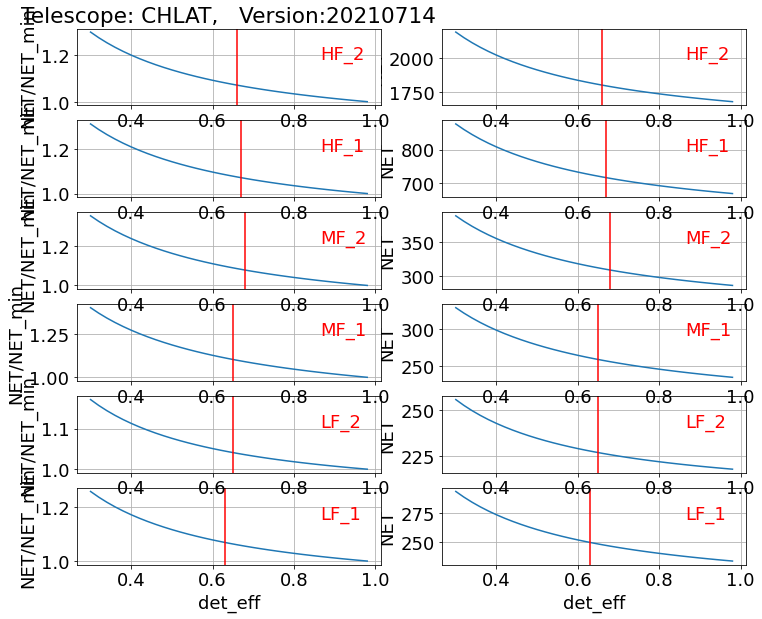

In [9]:
yaml_file = list(telescopes.keys())[0]
dd = yaml.safe_load(open(yaml_file))
# location of atmosphere file
dd['sim_config']['config_dir'] = '../../bolo-calc/config'
dd['version']['yaml']=yaml_file

channel_dict = bcv.vary_param_at_fixed_psat(xparam_name,xparam_vec,yparam_name,dd,psat)[1]
telescopes[yaml_file] = channel_dict

# Run SPLAT

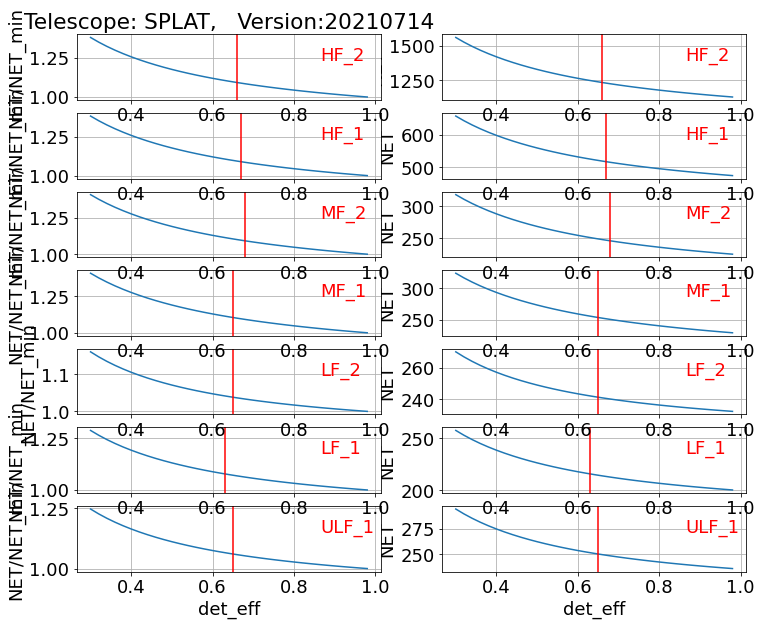

In [10]:
yaml_file = list(telescopes.keys())[1]
dd = yaml.safe_load(open(yaml_file))
# location of atmosphere file
dd['sim_config']['config_dir'] = '../../bolo-calc/config'
dd['version']['yaml']=yaml_file

channel_dict = bcv.vary_param_at_fixed_psat(xparam_name,xparam_vec,yparam_name,dd,psat)[1]
telescopes[yaml_file] = channel_dict

# Run SAT (at Pole)

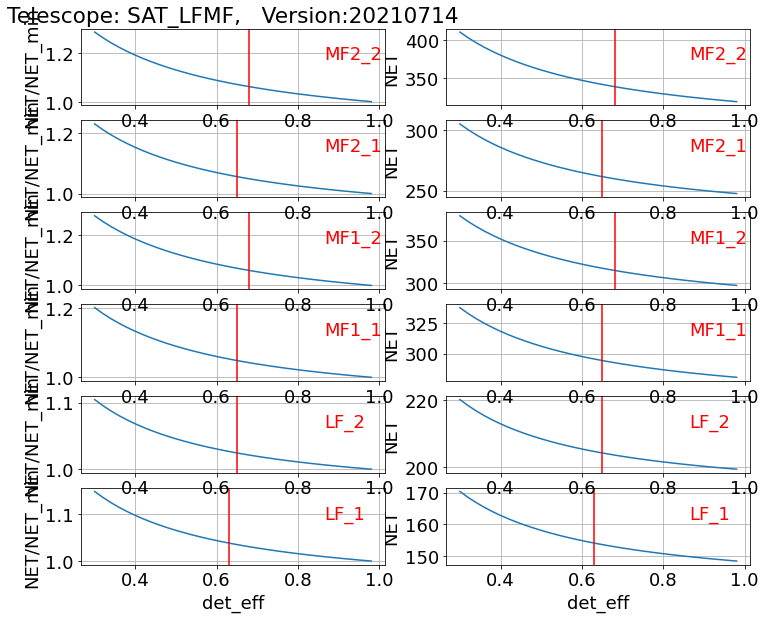

In [11]:
yaml_file = list(telescopes.keys())[2]
dd = yaml.safe_load(open(yaml_file))
# location of atmosphere file
dd['sim_config']['config_dir'] = '../../bolo-calc/config'
dd['version']['yaml']=yaml_file

version_date, channel_dict = bcv.vary_param_at_fixed_psat(xparam_name,xparam_vec,yparam_name,dd,psat)
telescopes[yaml_file] = channel_dict

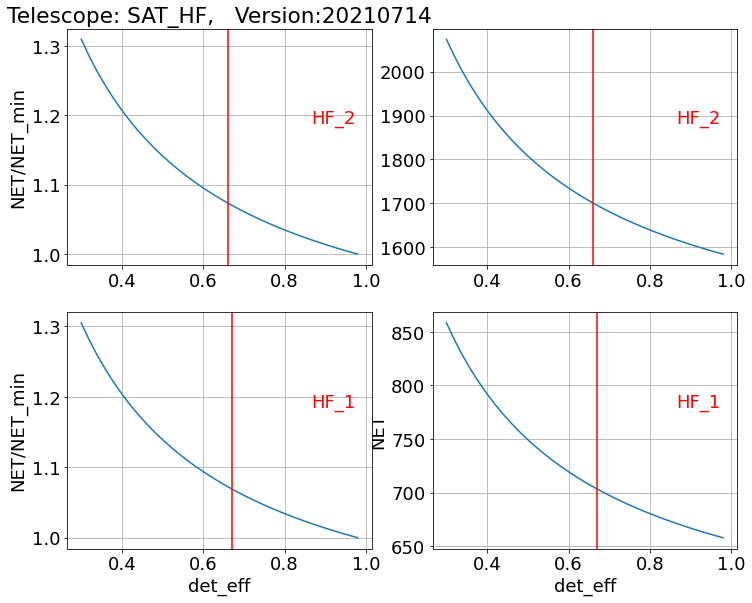

In [12]:
yaml_file = list(telescopes.keys())[3]
dd = yaml.safe_load(open(yaml_file))
# location of atmosphere file
dd['sim_config']['config_dir'] = '../../bolo-calc/config'
dd['version']['yaml']=yaml_file

version_date, channel_dict = bcv.vary_param_at_fixed_psat(xparam_name,xparam_vec,yparam_name,dd,psat)
telescopes[yaml_file] = channel_dict

# Write all three (CHLAT, SPLAT, SAT) to toml file.

In [13]:
telescopes["runtime"] = datetime.today().strftime('%Y/%m/%d %H:%M:%S')
telescopes["input_id"] = version_date
telescopes["variation"] = yparam_name + '_v_' + xparam_name

output_file_name = telescopes['variation'] + '.toml'

with open('outputs/' + output_file_name, "w") as toml_file:
    toml.dump(telescopes, toml_file, encoder=toml.TomlNumpyEncoder())

In [14]:
telescopes

{'CHLAT_20210714.yaml': {'LF_1': {'det_eff': array([0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44, 0.46, 0.48, 0.5 ,
          0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 , 0.72,
          0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94,
          0.96, 0.98]),
   'NET': array([294.01672565, 289.1168261 , 284.72336707, 280.76035942,
          277.16648344, 273.89167868, 270.89464959, 268.14101077,
          265.60188728, 263.25284423, 261.07305809, 259.0446682 ,
          257.15226394, 255.38247553, 253.72364469, 252.1655574 ,
          250.69922551, 249.31670707, 248.01095743, 246.77570531,
          245.60534886, 244.49486818, 243.43975125, 242.43593097,
          241.47973135, 240.56782137, 239.69717526, 238.86503813,
          238.06889624, 237.30645099, 236.57559636, 235.87439903,
          235.20108098, 234.55400413, 233.9316568 ]),
   'xdefault': 0.63},
  'LF_2': {'det_eff': array([0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44, 0.46, 0.48, 0.5 ,
